In [1]:
import sys
import os

PACKAGE_PARENT = '../../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent

from alphaslime.trainer.trainerSA import TrainerSA
from alphaslime.store.constantConfig import Constants
from alphaslime.store.config import Config



from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import gym
import csv

import time
import torch

import random

In [2]:
# create directory if not present
if not os.path.exists('tmp/ppo/'):
    os.makedirs('tmp/ppo/')

if not os.path.exists('plots/'):
    os.makedirs('plots/')

In [3]:
# constant config
env = gym.make('CartPole-v0')
env.seed(256)
random.seed(256)
action_table = [0,1]

# agent config
STEP_UPDATE = 20
input_dims = env.observation_space.shape
gamma = 0.99
alpha = 0.0003
gae_lambda = 0.95
policy_clip = 0.2
batch_size = 5
n_epochs = 4


# training config
threshold = 195
is_threshold_stop = False
running_avg_len = 100
is_progress = False
EPISODES = 300
# EPISODES = 1000

In [4]:
const = {
    'env': env,
    'action_table': action_table
}



agent_config = {
    'input_dims': input_dims,
    'gamma': gamma,
    'alpha':alpha,
    'gae_lambda': gae_lambda,
    'policy_clip': policy_clip,
    'batch_size': batch_size,
    'n_epochs': n_epochs,
    'STEP_UPDATE': STEP_UPDATE,
    'verbose': False
}


training_configs = {
    'agent_type': PPOAgent,
    'EPISODES': EPISODES,
    'is_progress': is_progress,
    'threshold': threshold, 
    'is_threshold_stop': is_threshold_stop,
    'running_avg_len': running_avg_len
}


CONST = Constants(const)
agent_hyper = Config(agent_config)
agent_training_configs = Config(training_configs)

figure_file = 'plots/cartpole.png'

In [5]:
def plot_learning_curve_plus_score(x, scores, figure_file):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.plot(scores)
    plt.title('Running average of previous 100 scores')
    plt.savefig(figure_file)


In [6]:
agent = PPOAgent(CONSTANTS=CONST, config=agent_config)
# train agent
agent.train(agent_training_configs)

training_data = agent.get_training_data()

score_history = training_data['rewards']

episode 0 score 29.0 avg score 29.0 time_steps 29 learning_steps 1
episode 1 score 21.0 avg score 25.0 time_steps 50 learning_steps 2
episode 2 score 20.0 avg score 23.3 time_steps 70 learning_steps 3
episode 3 score 26.0 avg score 24.0 time_steps 96 learning_steps 4
episode 4 score 13.0 avg score 21.8 time_steps 109 learning_steps 5
episode 5 score 24.0 avg score 22.2 time_steps 133 learning_steps 6
episode 6 score 37.0 avg score 24.3 time_steps 170 learning_steps 8
episode 7 score 18.0 avg score 23.5 time_steps 188 learning_steps 9
episode 8 score 14.0 avg score 22.4 time_steps 202 learning_steps 10
episode 9 score 15.0 avg score 21.7 time_steps 217 learning_steps 10
episode 10 score 16.0 avg score 21.2 time_steps 233 learning_steps 11
episode 11 score 8.0 avg score 20.1 time_steps 241 learning_steps 12
episode 12 score 21.0 avg score 20.2 time_steps 262 learning_steps 13
episode 13 score 19.0 avg score 20.1 time_steps 281 learning_steps 14
episode 14 score 18.0 avg score 19.9 time_s

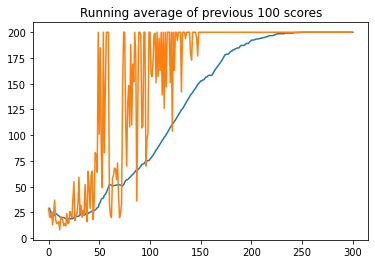

In [7]:
x = [i+1 for i in range(len(score_history))]
# plot_learning_curve(x, score_history, figure_file)
plot_learning_curve_plus_score(x, score_history, figure_file)